In [70]:
import os
import numpy as np  # useful for many scientific computing in Python
import pandas as pd # primary data structure library
import matplotlib.pyplot as plt
import datetime
import seaborn as sns
import matplotlib as mpl
%matplotlib inline


#mpl.style.use('ggplot') # optional: for ggplot-like style

# check for latest version of Matplotlib
# print('Matplotlib version: ', mpl.__version__) # >= 2.0.

In [3]:
orders = pd.read_csv('/Users/yichingchan/Documents/91APP/NTU_大數據與商業分析Datasets/Orders.csv')
df_orders = orders.copy()

/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3049: DtypeWarning: Columns (23) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [4]:
member = pd.read_csv('/Users/yichingchan/Documents/91APP/NTU_大數據與商業分析Datasets/Member.csv')
df_members = member.copy()

/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3049: DtypeWarning: Columns (8) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [5]:
ECoupon = pd.read_csv('/Users/yichingchan/Documents/91APP/NTU_大數據與商業分析Datasets/ECoupon.csv')
df_ECoupon = ECoupon.copy()

In [6]:
PromotionConditions = pd.read_csv('/Users/yichingchan/Documents/91APP/NTU_大數據與商業分析Datasets/PromotionConditions.csv')
df_PromotionConditions = PromotionConditions.copy()

In [7]:
PromotionOrders = pd.read_csv('/Users/yichingchan/Documents/91APP/NTU_大數據與商業分析Datasets/PromotionOrders.csv')
df_PromotionOrders = PromotionOrders.copy()

### Member 

In [8]:
df_members.head()

,MemberId,Birthday,GenderTypeDef,RegisterSourceTypeDef,RegisterDateTime,MinOrderDate,OpenCardPresent,LastBirthdayPresentYear,IsInBlackList
0,1587633,NaN,NaN,Web,2016-08-05 19:45:59.670,NaN,0,0,NaN
1,1587634,NaN,NaN,Web,2016-10-27 21:25:22.907,NaN,0,0,NaN
2,1587658,NaN,NaN,Web,2015-08-11 19:11:09.030,NaN,0,0,NaN
3,1587809,NaN,NaN,Web,2015-08-11 19:53:32.397,NaN,0,0,NaN
4,1587830,NaN,NaN,Web,2017-06-03 17:33:03.987,NaN,0,0,NaN


In [11]:
df_members.describe(include='all')

,MemberId,Birthday,GenderTypeDef,RegisterSourceTypeDef,RegisterDateTime,MinOrderDate,OpenCardPresent,LastBirthdayPresentYear,IsInBlackList
count,8.591460e+05,237275,237276,829143,859146,562300,859146.000000,859146.000000,1004
unique,NaN,15096,2,3,834059,1076,NaN,NaN,2
top,NaN,1996-11-13,Female,Web,2015-07-14 16:38:27.753,2016-11-11,NaN,NaN,是
freq,NaN,70,234540,624375,1771,2462,NaN,NaN,680
mean,2.401128e+06,NaN,NaN,NaN,NaN,NaN,1028.080041,464.840006,NaN
std,1.605855e+06,NaN,NaN,NaN,NaN,NaN,2385.726182,849.534746,NaN
min,1.321000e+03,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,NaN
25%,1.117701e+06,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,NaN
50%,2.134418e+06,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,NaN
75%,3.505592e+06,NaN,NaN,NaN,NaN,NaN,467.000000,0.000000,NaN


In [9]:
df_members.info()
#memberID沒有缺漏值，但不確定是會員（有主動註冊）還是有購物者就會自動補ID --> 應該是都有註冊，但有註冊不代表有開卡禮，要填資料才有

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 859146 entries, 0 to 859145
Data columns (total 9 columns):
MemberId                   859146 non-null int64
Birthday                   237275 non-null object
GenderTypeDef              237276 non-null object
RegisterSourceTypeDef      829143 non-null object
RegisterDateTime           859146 non-null object
MinOrderDate               562300 non-null object
OpenCardPresent            859146 non-null int64
LastBirthdayPresentYear    859146 non-null int64
IsInBlackList              1004 non-null object
dtypes: int64(3), object(6)
memory usage: 59.0+ MB


In [31]:
df_members['GenderTypeDef'].value_counts()
#發現男生非常少->可以忽略性別的差異，因為幾乎都是女生

Female    234540
Male        2736
Name: GenderTypeDef, dtype: int64

Web           624375
AndroidApp    109704
iOSApp         95064
Name: RegisterSourceTypeDef, dtype: int64


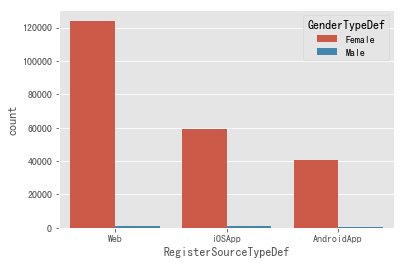

In [72]:
#註冊管道
print(df_members['RegisterSourceTypeDef'].value_counts())
sns.countplot(data = df_members, x = 'RegisterSourceTypeDef', hue='GenderTypeDef')
#高比例是web註冊，其次是IOS

#不同裝置單次購物金額是否有差？

In [88]:
#開卡禮
df_members['OpenCardPresent'].value_counts() #有624888個人沒有領開卡禮
#數字什麼意思？？promotion code??

0        624888
1078      11997
1292      11092
1838      10618
630       10577
2664      10531
8596      10311
544        9982
10342      9443
2577       9278
467        9040
1438       8551
2294       8378
2051       7922
5489       7771
4974       7702
8052       6955
1626       6950
7693       6862
5493       6103
10788      5812
4559       5701
812        5065
383        4986
9175       4865
3581       4729
5938       4729
7282       4265
961        4199
6547       3921
6879       3314
190        3267
4183       3262
318        3042
11428      1414
173        1168
127         370
98           86
Name: OpenCardPresent, dtype: int64

In [29]:
#根據有沒有領開卡禮設boolean
df_members.loc[df_members.OpenCardPresent == 0, 'get_OpenCardPresent'] = False
df_members.loc[df_members.OpenCardPresent != 0, 'get_OpenCardPresent'] = True
print(df_members['get_OpenCardPresent'].value_counts())

False    624888
True     234258
Name: get_OpenCardPresent, dtype: int64


0       661189
2017    111790
2018     86165
2016         2
Name: LastBirthdayPresentYear, dtype: int64
False    661189
True     197957
Name: get_LastBirthdayPresentYear, dtype: int64
get_OpenCardPresent  get_LastBirthdayPresentYear
False                False                          621898
                     True                             2990
True                 True                           194967
                     False                           39291
Name: get_LastBirthdayPresentYear, dtype: int64


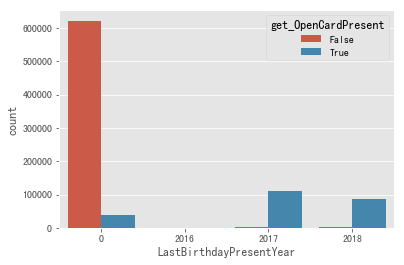

In [53]:
#領生日禮
print(df_members['LastBirthdayPresentYear'].value_counts() ) #有661189個人沒有領生日禮
sns.countplot(data = df_members, x = 'LastBirthdayPresentYear', hue='get_OpenCardPresent') 

#根據有沒有領生日禮設boolean
df_members.loc[df_members.LastBirthdayPresentYear == 0, 'get_LastBirthdayPresentYear'] = False
df_members.loc[df_members.LastBirthdayPresentYear != 0, 'get_LastBirthdayPresentYear'] = True
print(df_members['get_LastBirthdayPresentYear'].value_counts())

print(df_members.groupby('get_OpenCardPresent')['get_LastBirthdayPresentYear'].value_counts())
#沒有領開卡禮的人，也幾乎都沒有領生日禮
#有領開卡禮的人，有蠻多也有領生日禮 (約20萬人)-->是否真的有消費？有！約17萬有首購

In [92]:
#根據有沒有首購設boolean
df_members.loc[df_members.MinOrderDate.notnull() == False, 'MinOrder'] = False
df_members.loc[df_members.MinOrderDate.notnull() == True, 'MinOrder'] = True
df_members['MinOrder'].value_counts()

True     562300
False    296846
Name: MinOrder, dtype: int64

get_OpenCardPresent  get_LastBirthdayPresentYear  MinOrder
False                False                        True        360568
                                                  False       261330
                     True                         True          1980
                                                  False         1010
True                 False                        True         32072
                                                  False         7219
                     True                         True        167680
                                                  False        27287
Name: MinOrder, dtype: int64


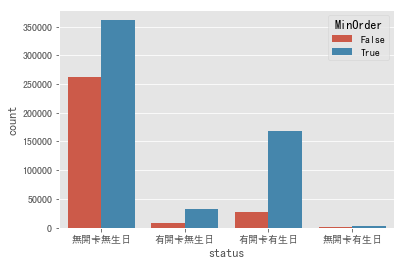

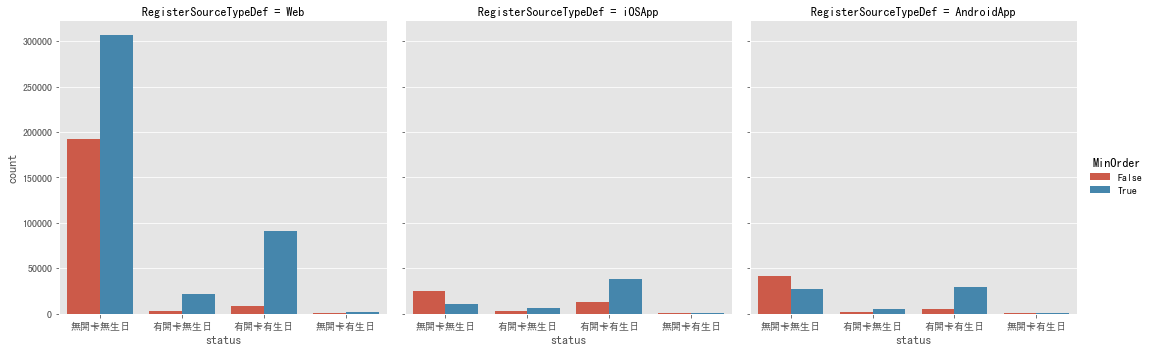

In [86]:
print(df_members.groupby(['get_OpenCardPresent','get_LastBirthdayPresentYear'])['MinOrder'].value_counts())

#把有無開卡禮和生日禮寫在一起
df_members.loc[(df_members.get_OpenCardPresent == True) & (df_members.get_LastBirthdayPresentYear == True), 'status'] = '有開卡有生日'
df_members.loc[(df_members.get_OpenCardPresent == True) & (df_members.get_LastBirthdayPresentYear == False), 'status'] = '有開卡無生日'
df_members.loc[(df_members.get_OpenCardPresent == False) & (df_members.get_LastBirthdayPresentYear == True), 'status'] = '無開卡有生日'
df_members.loc[(df_members.get_OpenCardPresent == False) & (df_members.get_LastBirthdayPresentYear == False), 'status'] = '無開卡無生日'

sns.countplot(data = df_members, x = 'status', hue='MinOrder') 
#無開卡無生日禮的，有非常多人首購 
#有開卡禮的人有蠻高比例會消費，有生日禮的卻不然 --> 猜測有開卡禮有生日禮的應該算「較活躍客戶」

##下載aPP就有送線上折價卷200，填資料才送開卡禮100，生日禮1200

sns.catplot(data = df_members, x = 'status', hue='MinOrder', col = 'RegisterSourceTypeDef', kind='count') 
#無開卡無生日禮的 --> 多用web首購
#有開卡有生日禮的 --> 最多用web首購，但用APP的人數多於開卡無生日禮的人用aPP首購的人數 
#  --> 會下載aPP填寫會員資料的基本上就是黏著性較高的人？不然填資料其實蠻麻煩？

#(1)有開卡有生日禮的，且用APP購物的，是否之後的消費行為也多用APP消費？還是購買數量會影響決定用哪個管道？
#(2)細部去看開卡禮和生日禮對後續消費日期的影響 --> 是不是黏著度高的客戶，對促銷和折扣較敏感，表示較有刺激消費的效果？
#(3)無生日無生日 和 有開卡有生日 的消費行為有何差異？ 
#(4)無開卡有生日 人很少，先忽略


### Orders

In [87]:
df_orders.head()

,DateId,MemberId,OrderGroupCode,TrackSourceTypeDef,TrackDeviceTypeDef,PayProfileTypeDef,SalesOrderSlaveId,SalePageId,IsMajor,IsGift,...,SalesOrderReceiverId,City,District,ZipCode,StoreName,StoreId,DeliverTypeDef,StatusDef,ReturnGoodsDateId,CauseDef
0,20150703,1388133,b'\xd0_\x8eby\xe8\x88\xa5\x85\xe4\x15\nMC\xeaO...,Web,Mobile,SevenEleven,4457777,1242871,True,False,...,1480890,嘉義縣,水上鄉,608.0,中庄門市,910828,SevenEleven,Finish,NaN,NaN
1,20150703,1388133,b'\xd0_\x8eby\xe8\x88\xa5\x85\xe4\x15\nMC\xeaO...,Web,Mobile,SevenEleven,4457778,1242880,True,False,...,1480890,嘉義縣,水上鄉,608.0,中庄門市,910828,SevenEleven,Finish,NaN,NaN
2,20150703,1388133,b'\xd0_\x8eby\xe8\x88\xa5\x85\xe4\x15\nMC\xeaO...,Web,Mobile,SevenEleven,4457779,1242880,True,False,...,1480890,嘉義縣,水上鄉,608.0,中庄門市,910828,SevenEleven,Finish,NaN,NaN
3,20150703,1388133,b'\xd0_\x8eby\xe8\x88\xa5\x85\xe4\x15\nMC\xeaO...,Web,Mobile,SevenEleven,4457780,1175574,True,False,...,1480890,嘉義縣,水上鄉,608.0,中庄門市,910828,SevenEleven,Finish,NaN,NaN
4,20150703,365787,"b""\x04?}pe$m\x7f\x85\xa0y\x81'e5\xca\xbb\xf9\x...",Web,Mobile,SevenEleven,4457791,1194488,True,False,...,1480896,桃園市,中壢區,320.0,復華門市,114071,SevenEleven,Finish,NaN,NaN


In [89]:
df_orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5495276 entries, 0 to 5495275
Data columns (total 28 columns):
DateId                         int64
MemberId                       int64
OrderGroupCode                 object
TrackSourceTypeDef             object
TrackDeviceTypeDef             object
PayProfileTypeDef              object
SalesOrderSlaveId              int64
SalePageId                     int64
IsMajor                        bool
IsGift                         bool
IsSalePageGift                 bool
Quantity                       int64
UnitPrice                      float64
PromotionDiscount              float64
ECouponId                      int64
ECouponDiscount                float64
SalesOrderSlaveTotalPayment    float64
SalesOrderSlaveDateTime        object
SalesOrderReceiverId           int64
City                           object
District                       object
ZipCode                        float64
StoreName                      object
StoreId              

In [91]:
df_orders['MemberId'].nunique() #和member dataset中有首購的人數差不多 #有不是會員的人在裡面嗎？

563457

In [110]:
#把有沒有生日禮和開卡禮的狀態，加入到df_orders
df_orders = pd.merge(df_orders, df_members[['MemberId', 'status']], on = 'MemberId', how = 'outer')

In [124]:
df_orders.groupby('MemberId')['status'].value_counts() 

MemberId  status
1321      無開卡無生日     1
1323      無開卡無生日     1
1326      無開卡無生日     1
1328      無開卡無生日     1
1329      無開卡無生日     3
1331      無開卡無生日     1
1334      無開卡無生日     3
1356      無開卡無生日     1
1362      有開卡有生日     4
1364      無開卡無生日     1
1372      無開卡無生日     2
1373      無開卡無生日    14
1380      無開卡無生日     1
1384      無開卡無生日     6
1391      有開卡無生日    25
1393      無開卡無生日     1
1400      無開卡無生日     1
1423      無開卡無生日     2
1448      無開卡無生日    29
1463      有開卡無生日     1
1469      有開卡有生日    53
1474      無開卡無生日    14
1489      無開卡無生日     1
1490      有開卡有生日    14
1498      有開卡有生日     6
1514      無開卡無生日     2
1537      無開卡無生日     1
1542      無開卡無生日     1
1550      無開卡無生日     1
1583      無開卡無生日     1
                    ..
6763264   無開卡無生日     1
6763309   無開卡無生日     2
6763324   無開卡無生日     1
6763478   無開卡無生日     1
6763531   有開卡無生日     1
6763600   無開卡無生日     3
6763691   無開卡無生日     1
6763694   無開卡無生日    11
6763822   無開卡無生日     3
6763857   有開卡有生日     1
6764214   有開卡無生日     7
6764258   無開卡無生日 

In [137]:
df_orders['status'].notnull().value_counts() #merge之後orders多了未購物者的資料
#只留下有購物者的資料
df_orders.dropna(subset=['DateId'], inplace=True) #恢復成原來的5495276筆資料

In [148]:
df_orders['status'].notnull().value_counts() #有5065筆資料不是會員（？）
df_orders['status'].fillna('沒資料', inplace=True) #把沒資料的補上「沒資料」

True    5495276
Name: status, dtype: int64

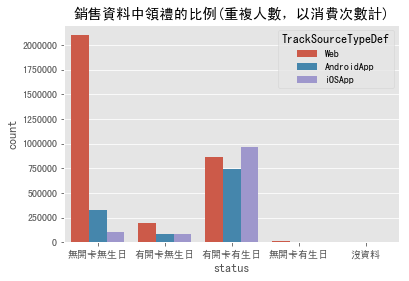

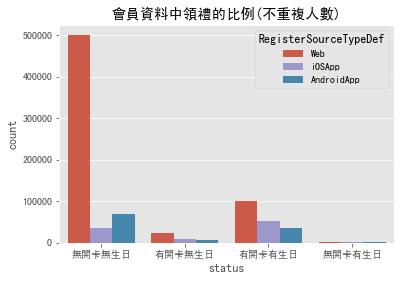

In [169]:
palette ={"Web":"C0","AndroidApp":"C1","iOSApp":"C2"}
sns.countplot(data = df_orders, x = 'status', hue ='TrackSourceTypeDef',  order = ['無開卡無生日', '有開卡無生日','有開卡有生日','無開卡有生日','沒資料'],palette = palette) 
plt.title('銷售資料中領禮的比例(重複人數，以消費次數計)')
plt.show()
#沒開卡沒生日：購物次數超多（幾乎全是會員）！且大多用web消費
#有開卡：最多用ios消費，且三種來源的比例沒差太多

sns.countplot(data = df_members, x = 'status', hue ='RegisterSourceTypeDef', order = ['無開卡無生日', '有開卡無生日','有開卡有生日','無開卡有生日'],palette = palette) 
plt.title('會員資料中領禮的比例(不重複人數)')
plt.show()

In [178]:
df_members['RegisterSourceTypeDef'].isnull().value_counts() #但member資料中，有30000筆資料不知道註冊來源

False    829143
True      30003
Name: RegisterSourceTypeDef, dtype: int64

In [180]:
print(df_orders['TrackSourceTypeDef'].isnull().value_counts()) #orders的都有
print(df_orders['TrackDeviceTypeDef'].isnull().value_counts())

False    5495276
Name: TrackSourceTypeDef, dtype: int64
False    5495276
Name: TrackDeviceTypeDef, dtype: int64


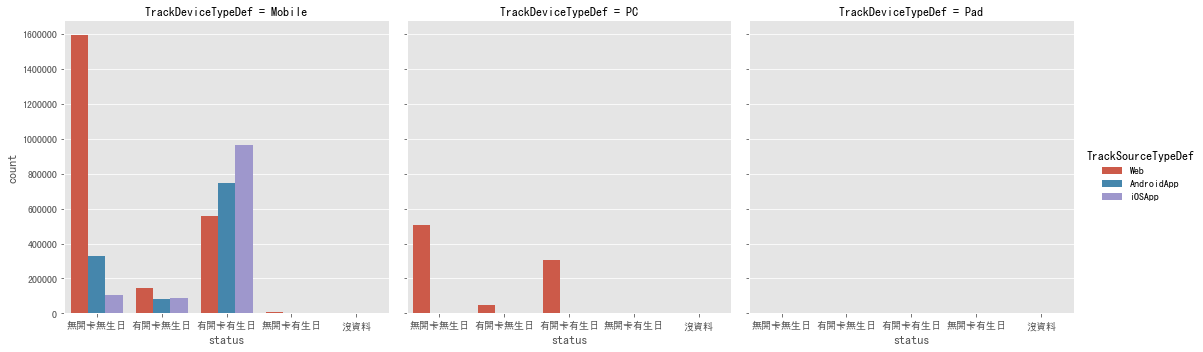

In [186]:
#銷售資料中領禮的比例(以消費次數計)
sns.catplot(data = df_orders, x = 'status', col ='TrackDeviceTypeDef', hue = 'TrackSourceTypeDef', kind='count',order = ['無開卡無生日', '有開卡無生日','有開卡有生日','無開卡有生日','沒資料']) 
plt.show()

#大多用mobile
#無開卡無生日的：非常高比例用mobile，用PC的只有約1/3
#有開卡有生日禮的，用web的最少，用app的是用web的三倍！

In [187]:
df_orders['TrackDeviceTypeDef'].value_counts() #用pad的人很少，可忽略

Mobile    4629625
PC         865384
Pad           267
Name: TrackDeviceTypeDef, dtype: int64